<a href="https://colab.research.google.com/github/OJO44/Python-Data-Analysis/blob/main/sport_analyticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-04-07/tdf_winners.csv"
sports = pd.read_csv(data)
sports.head()

,edition,start_date,winner_name,winner_team,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age,born,died,full_name,nickname,birth_town,birth_country,nationality
0,1,1903-07-01,Maurice Garin,La Française,2428.0,94.553889,2.989167,3,6,1.62,60.0,32,1871-03-03,1957-02-19,NaN,The Little Chimney-sweep,Arvier,Italy,France
1,2,1904-07-02,Henri Cornet,Conte,2428.0,96.098611,2.270556,1,3,NaN,NaN,19,1884-08-04,1941-03-18,NaN,Le rigolo (The joker),Desvres,France,France
2,3,1905-07-09,Louis Trousselier,Peugeot–Wolber,2994.0,NaN,NaN,5,10,NaN,NaN,24,1881-06-29,1939-04-24,NaN,Levaloy / Trou-trou,Paris,France,France
3,4,1906-07-04,René Pottier,Peugeot–Wolber,4637.0,NaN,NaN,5,12,NaN,NaN,27,1879-06-05,1907-01-25,NaN,NaN,Moret-sur-Loing,France,France
4,5,1907-07-08,Lucien Petit-Breton,Peugeot–Wolber,4488.0,NaN,NaN,2,5,NaN,NaN,24,1882-10-18,1917-12-20,Lucien Georges Mazan,Lucien Petit-Breton,Plessé,France,France


In [3]:
print(sports.columns)

Index(['edition', 'start_date', 'winner_name', 'winner_team', 'distance',
       'time_overall', 'time_margin', 'stage_wins', 'stages_led', 'height',
       'weight', 'age', 'born', 'died', 'full_name', 'nickname', 'birth_town',
       'birth_country', 'nationality'],
      dtype='object')


In [4]:
#variable types
print(sports.dtypes)

edition            int64
start_date        object
winner_name       object
winner_team       object
distance         float64
time_overall     float64
time_margin      float64
stage_wins         int64
stages_led         int64
height           float64
weight           float64
age                int64
born              object
died              object
full_name         object
nickname          object
birth_town        object
birth_country     object
nationality       object
dtype: object


In [5]:
#convert start date to an appropriate data type.
sports['start_date'] = pd.to_datetime(sports['start_date'])
sports['born'] = pd.to_datetime(sports['born'])
sports['died'] = pd.to_datetime(sports['died'])
sports.head()
print(sports.dtypes)

edition                   int64
start_date       datetime64[ns]
winner_name              object
winner_team              object
distance                float64
time_overall            float64
time_margin             float64
stage_wins                int64
stages_led                int64
height                  float64
weight                  float64
age                       int64
born             datetime64[ns]
died             datetime64[ns]
full_name                object
nickname                 object
birth_town               object
birth_country            object
nationality              object
dtype: object


In [46]:
print(sports.shape)

(106, 19)


In [47]:
#count missing values on each column
missing_values = sports.isnull().sum()
print(missing_values)

edition           0
start_date        0
winner_name       0
winner_team       0
distance          0
time_overall      8
time_margin       8
stage_wins        0
stages_led        0
height           40
weight           39
age               0
born              0
died             50
full_name        60
nickname         32
birth_town        0
birth_country     0
nationality       0
dtype: int64


In [48]:
#print out only columns with missing values in this case, they are; height, weight, full_name,nickname
missing_columns = sports[['height', 'weight', 'full_name', 'nickname', 'died']]
print(missing_columns[missing_columns.isnull().any(axis=1)])

     height  weight                 full_name                  nickname  \
0      1.62    60.0                       NaN  The Little Chimney-sweep   
1       NaN     NaN                       NaN     Le rigolo (The joker)   
2       NaN     NaN                       NaN       Levaloy / Trou-trou   
3       NaN     NaN                       NaN                       NaN   
4       NaN     NaN      Lucien Georges Mazan       Lucien Petit-Breton   
..      ...     ...                       ...                       ...   
101    1.86    69.0  Christopher Clive Froome                   Froomey   
102    1.86    69.0  Christopher Clive Froome                   Froomey   
103    1.86    69.0  Christopher Clive Froome                   Froomey   
104    1.83    71.0     Geraint Howell Thomas                         G   
105    1.75    60.0   Egan Arley Bernal Gómez                       NaN   

          died  
0   1957-02-19  
1   1941-03-18  
2   1939-04-24  
3   1907-01-25  
4   1917-12-20

In [50]:
#count missing values on each column
missing_values = sports.isnull().sum()
print(missing_values)

edition           0
start_date        0
winner_name       0
winner_team       0
distance          0
time_overall      0
time_margin       0
stage_wins        0
stages_led        0
height            0
weight            0
age               0
born              0
died             50
full_name        60
nickname         32
birth_town        0
birth_country     0
nationality       0
dtype: int64


In [51]:
#fill the missing values in height and weight with the average height and weight, time_overall, time_margin
mean_weight = sports['weight'].mean()
mean_height = sports['height'].mean()
mean_overall_time = sports["time_overall"].mean()
mean_time_margin = sports["time_margin"].mean()

sports['weight'].fillna(mean_weight, inplace=True)
sports['height'].fillna(mean_height, inplace=True)
sports["time_overall"].fillna(mean_overall_time, inplace = True)
sports["time_margin"].fillna(mean_time_margin, inplace=True)


In [52]:
#drop these columns :born, died, full name, nickname, birthtown, birth country
sports = sports.drop(['born', 'died', 'full_name', 'nickname', 'birth_town', 'birth_country'], axis=1)
sports.head()

,edition,start_date,winner_name,winner_team,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age,nationality
0,1,1903-07-01,Maurice Garin,La Française,2428.0,94.553889,2.989167,3,6,1.620000,60.000000,32,France
1,2,1904-07-02,Henri Cornet,Conte,2428.0,96.098611,2.270556,1,3,1.778788,69.253731,19,France
2,3,1905-07-09,Louis Trousselier,Peugeot–Wolber,2994.0,125.754983,0.267727,5,10,1.778788,69.253731,24,France
3,4,1906-07-04,René Pottier,Peugeot–Wolber,4637.0,125.754983,0.267727,5,12,1.778788,69.253731,27,France
4,5,1907-07-08,Lucien Petit-Breton,Peugeot–Wolber,4488.0,125.754983,0.267727,2,5,1.778788,69.253731,24,France


In [53]:
missing_values = sports.isnull().sum()
print(missing_values)


edition         0
start_date      0
winner_name     0
winner_team     0
distance        0
time_overall    0
time_margin     0
stage_wins      0
stages_led      0
height          0
weight          0
age             0
nationality     0
dtype: int64


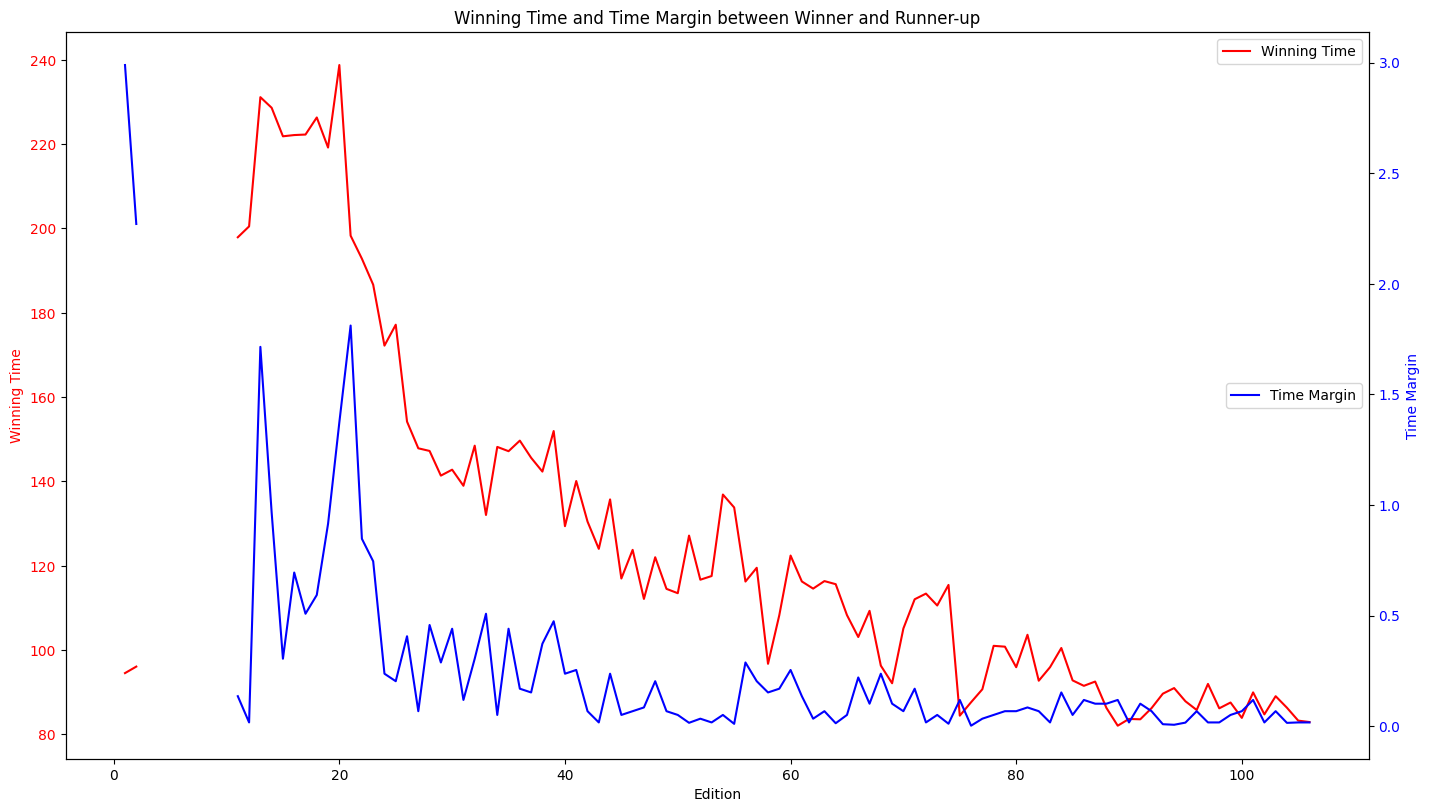

In [17]:
# Calculate the time margin between the winner and the runner-up
time_margin = sports['time_margin']
import matplotlib.pyplot as plt

# Create a figure with the specified size and a set of subplots
fig, ax1 = plt.subplots(figsize=(14.4, 8))

# Plot the winning time
ax1.set_xlabel('Edition')  # Set the label for the x-axis
ax1.set_ylabel('Winning Time', color='red')  # Set the label for the y-axis and specify the color
line1 = ax1.plot(sports['edition'], sports['time_overall'], color='red', label='Winning Time')  # Plot the winning time and add a label
ax1.tick_params(axis='y', labelcolor='red')  # Set the color of the y-axis ticks

# Create a second y-axis that shares the same x-axis as the first plot
ax2 = ax1.twinx()

# Plot the time margin
ax2.set_ylabel('Time Margin', color='blue')  # Set the label for the y-axis and specify the color
line2 = ax2.plot(sports['edition'], time_margin, color='blue', label='Time Margin')  # Plot the time margin and add a label
ax2.tick_params(axis='y', labelcolor='blue')  # Set the color of the y-axis ticks

# Combine the legends for both plots and position them at the upper right
ax1.legend(loc='upper right')
ax2.legend(loc= 'center right')

# Adjust the subplot layout to fit into the figure area
fig.tight_layout()

# Set the title for the visualization
plt.title('Winning Time and Time Margin between Winner and Runner-up')

# Display the visualization
plt.show()
